# Problem Statement:

To study a Diabetes data set and build a Machine Learning model that predicts whether or not a person has Diabetes

# Data Set Description: 

The given data set contains 100s of observations of patients along with their health details. Here’s a list of the predictor variables that will help us classify a patient as either Diabetic or Normal:

# Install and load the requires packages

In [1]:
#Loading required packages
#install.packages('tidyverse')
library(tidyverse)
#install.packages('ggplot2')
library(ggplot2)
#install.packages('caret')
library(caret)
#install.packages('caretEnsemble')
library(caretEnsemble)
#install.packages('psych')
library(psych)
#install.packages('Amelia')
library(Amelia)
#install.packages('mice')
library(mice)
#install.packages('GGally')
library(GGally)
#install.packages('rpart')
library(rpart)
#install.packages('randomForest')
library(randomForest)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


The following object is masked from ‘package:httr’:

    progress



Attaching package: ‘caretEnsemble’


The following object is masked from ‘package:ggplot2’:

    autoplot



Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha


Loading required package: Rcpp

## 
## Amelia II: Multiple Imputation
## (Version 1.7.6, built: 2019-11-24)
## Copyright (C) 2005-2023 James Honaker, Gary King and Matthew Blackwell
## Refer to http://g

# Import the data set

In [2]:
#Reading data into R
data<- read.csv("../input/diabetes/diabetes.csv")
head(data)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,2,138,62,35,0,33.6,0.127,47,1
2,0,84,82,31,125,38.2,0.233,23,0
3,0,145,0,0,0,44.2,0.630,31,1
4,0,135,68,42,250,42.3,0.365,24,1
5,1,139,62,41,480,40.7,0.536,21,0
6,0,173,78,32,265,46.5,1.159,58,0


In [3]:
#Setting outcome variables as categorical
data$Outcome <- factor(data$Outcome, levels = c(0,1), labels = c("False", "True"))

# Studying the Data Set

In [4]:
describe(data)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Pregnancies,1,2000,3.70350,3.3060630,3.000,3.2981250,2.9652000,0.000,17.00,17.000,0.9808925,0.4024401,0.073925817
Glucose,2,2000,121.18250,32.0686356,117.000,119.7112500,29.6520000,0.000,199.00,199.000,0.1585677,0.5524171,0.717076493
BloodPressure,3,2000,69.14550,19.1883148,72.000,71.3293750,11.8608000,0.000,122.00,122.000,-1.8516952,5.3038693,0.429063763
SkinThickness,4,2000,20.93500,16.1032429,23.000,20.3468750,17.7912000,0.000,110.00,110.000,0.2069174,0.1490412,0.360079458
Insulin,5,2000,80.25400,111.1805335,40.000,58.4318750,59.3040000,0.000,744.00,744.000,1.9930912,5.1043410,2.486072308
BMI,6,2000,32.19300,8.1499007,32.300,32.0711875,6.9682200,0.000,80.60,80.600,-0.0903197,4.1112849,0.182237320
DiabetesPedigreeFunction,7,2000,0.47093,0.3235526,0.376,0.4224337,0.2490768,0.078,2.42,2.342,1.8092618,4.9833437,0.007234855
Age,8,2000,33.09050,11.7864231,29.000,31.3187500,10.3782000,21.000,81.00,60.000,1.1794959,0.8174996,0.263552433
Outcome*,9,2000,1.34200,0.4744982,1.000,1.3025000,0.0000000,1.000,2.00,1.000,0.6656337,-1.5577099,0.010610103


# Data Cleaning

In [5]:
#Convert '0' values into NA
data[, 2:7][data[, 2:7] == 0] <- NA

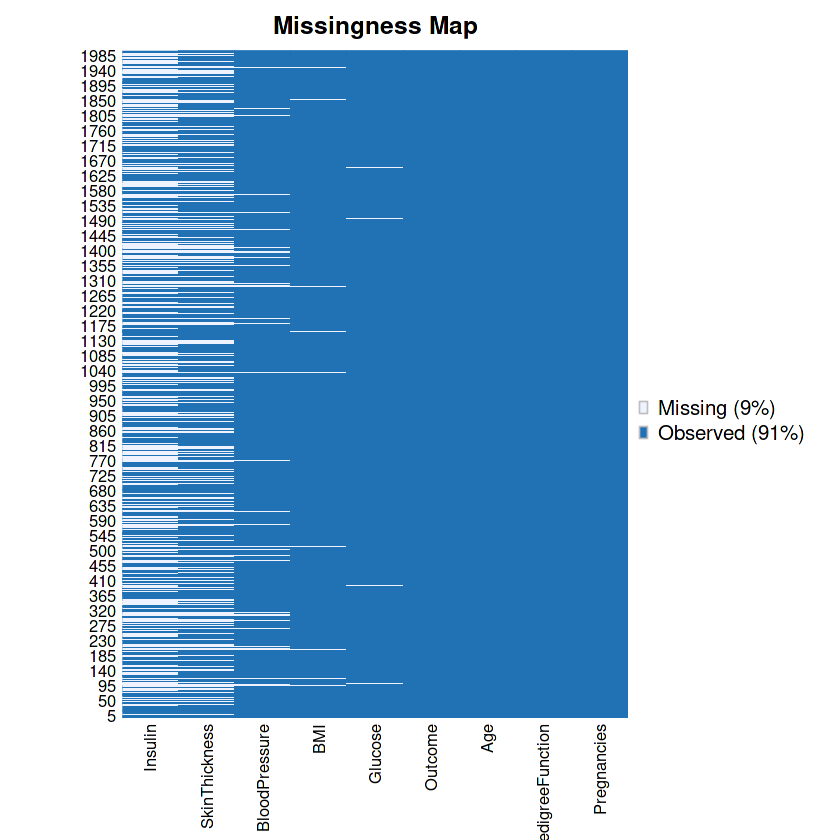

In [6]:
#visualize the missing data
missmap(data)

In [7]:
#Use mice package to predict missing values
mice_mod <- mice(data[, c("Glucose","BloodPressure","SkinThickness","Insulin","BMI")], method='rf')
mice_complete <- complete(mice_mod)


 iter imp variable
  1   1  Glucose  BloodPressure  SkinThickness  Insulin  BMI
  1   2  Glucose  BloodPressure  SkinThickness  Insulin  BMI
  1   3  Glucose  BloodPressure  SkinThickness  Insulin  BMI
  1   4  Glucose  BloodPressure  SkinThickness  Insulin  BMI
  1   5  Glucose  BloodPressure  SkinThickness  Insulin  BMI
  2   1  Glucose  BloodPressure  SkinThickness  Insulin  BMI
  2   2  Glucose  BloodPressure  SkinThickness  Insulin  BMI
  2   3  Glucose  BloodPressure  SkinThickness  Insulin  BMI
  2   4  Glucose  BloodPressure  SkinThickness  Insulin  BMI
  2   5  Glucose  BloodPressure  SkinThickness  Insulin  BMI
  3   1  Glucose  BloodPressure  SkinThickness  Insulin  BMI
  3   2  Glucose  BloodPressure  SkinThickness  Insulin  BMI
  3   3  Glucose  BloodPressure  SkinThickness  Insulin  BMI
  3   4  Glucose  BloodPressure  SkinThickness  Insulin  BMI
  3   5  Glucose  BloodPressure  SkinThickness  Insulin  BMI
  4   1  Glucose  BloodPressure  SkinThickness  Insulin  BMI
  4 

In [8]:
#Transfer the predicted missing values into the main data set
data$Glucose <- mice_complete$Glucose
data$BloodPressure <- mice_complete$BloodPressure
data$SkinThickness <- mice_complete$SkinThickness
data$Insulin<- mice_complete$Insulin
data$BMI <- mice_complete$BMI

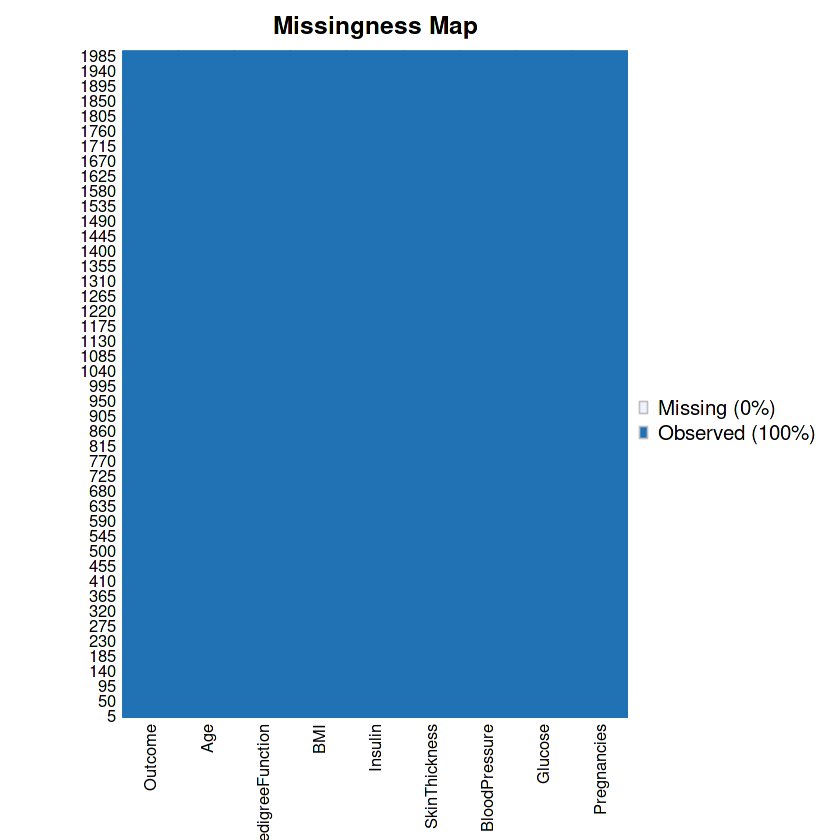

In [9]:
missmap(data)

# Exploratory Data Analysis

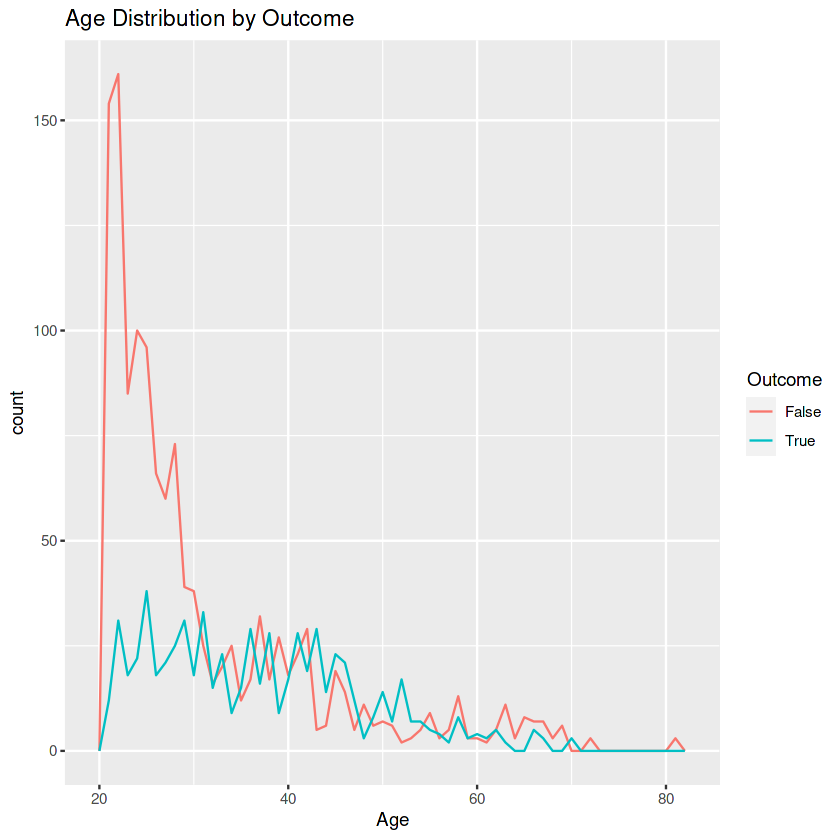

In [10]:
#Data Visualization
#Visual 1
ggplot(data, aes(Age, colour = Outcome)) +
geom_freqpoly(binwidth = 1) + labs(title="Age Distribution by Outcome")

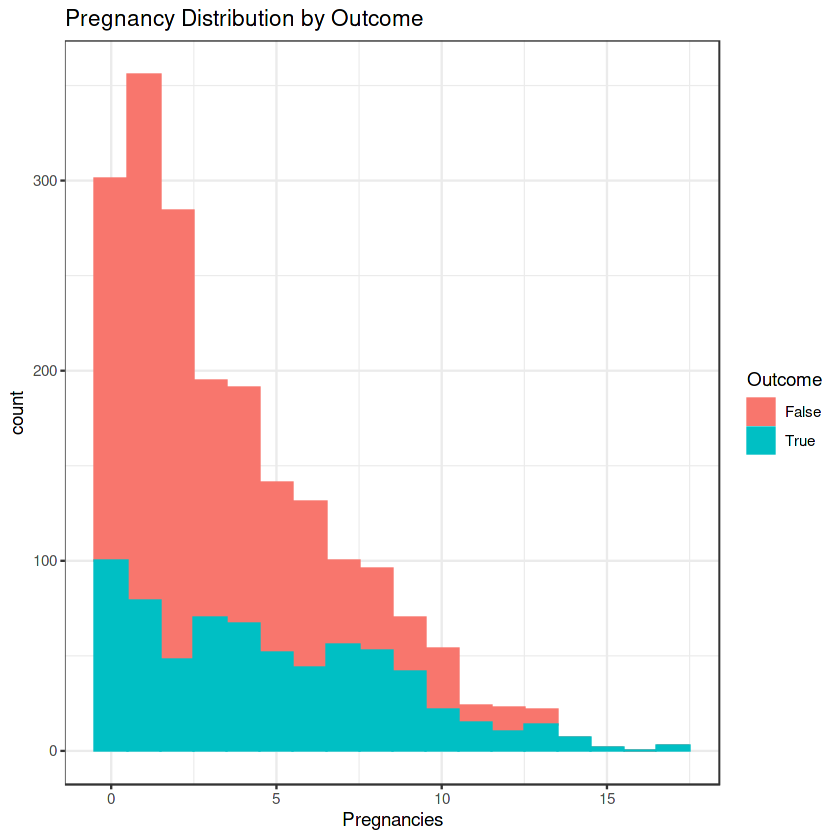

In [11]:
#visual 2
c <- ggplot(data, aes(x=Pregnancies, fill=Outcome, color=Outcome)) +
geom_histogram(binwidth = 1) + labs(title="Pregnancy Distribution by Outcome")
c + theme_bw()

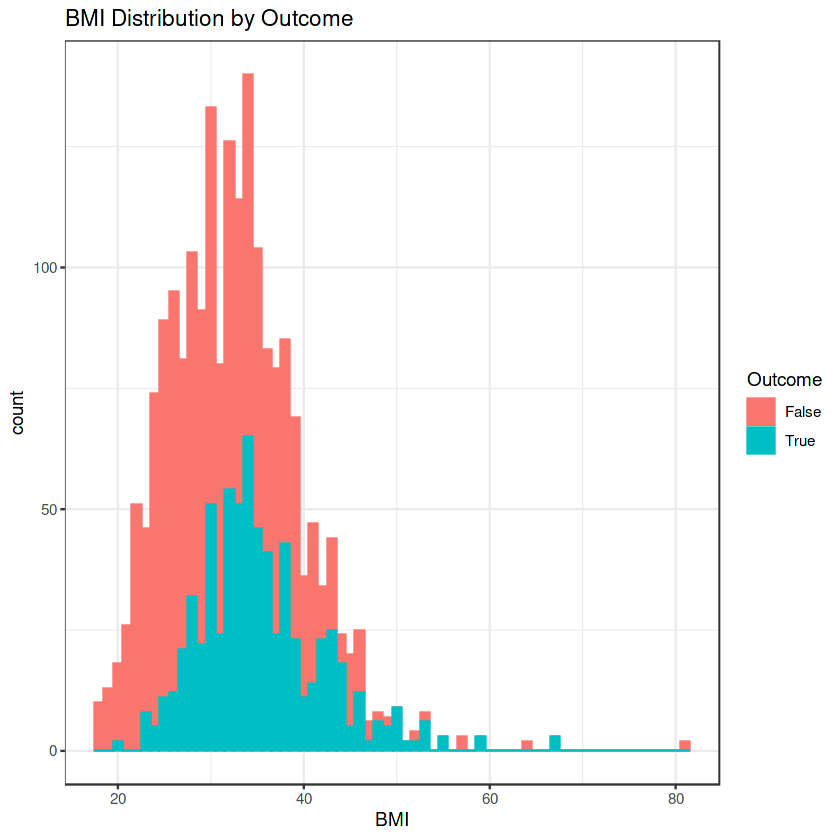

In [12]:
#visual 3
P <- ggplot(data, aes(x=BMI, fill=Outcome, color=Outcome)) +
geom_histogram(binwidth = 1) + labs(title="BMI Distribution by Outcome")
P + theme_bw()

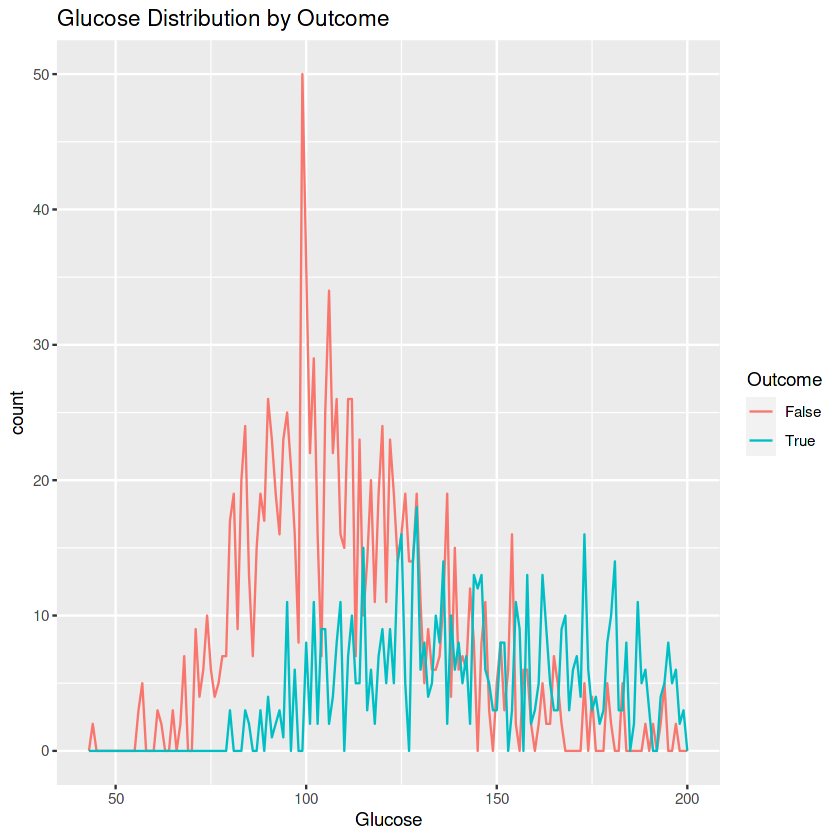

In [13]:
#visual 4
ggplot(data, aes(Glucose, colour = Outcome)) +
geom_freqpoly(binwidth = 1) + labs(title="Glucose Distribution by Outcome")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



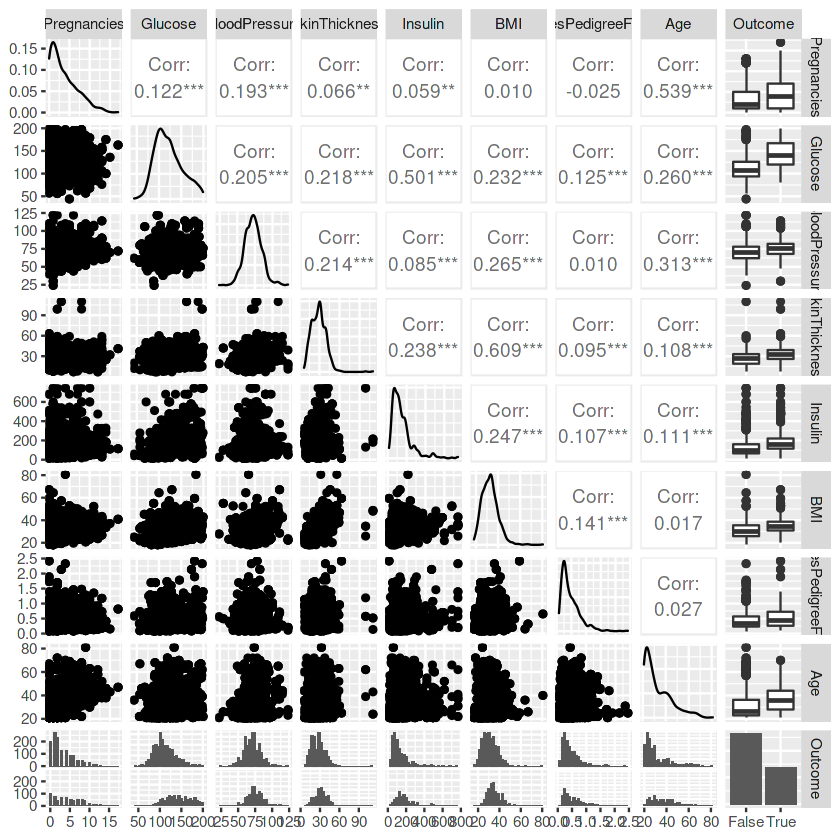

In [14]:
#visual 5
ggpairs(data)

# Data Modelling

In [21]:
#Building a model
#split data into training and test data sets
indxTrain <- createDataPartition(y = data$Outcome,p = 0.75,list = FALSE)
training <- data[indxTrain,]
testing <- data[-indxTrain,] #Check dimensions of the split > prop.table(table(data$Outcome)) * 100

In [22]:
#create objects x which holds the predictor variables and y which holds the response variables
x = training[,-9]
y = training$Outcome

In [23]:
library(e1071)  #oad the e1071 package that holds the Naive Bayes function

In [25]:
model = train(x,y,'nb',trControl=trainControl(method='cv',number=10))

Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 1”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 2”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 3”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 4”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 5”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 6”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 7”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 8”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 9”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 10”
Warning message in 

# Model Evaluation

In [19]:
#Model Evaluation
#Predict testing set
Predict <- predict(model,newdata = testing ) #Get the confusion matrix to see accuracy value and other parameter values > confusionMatrix(Predict, testing$Outcome )

Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 1”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 2”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 3”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 4”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 5”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 6”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 7”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 8”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 9”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 10”
Warning message in 

In [26]:
confusionMatrix(Predict, testing$Outcome )

Confusion Matrix and Statistics

          Reference
Prediction False True
     False   213  114
     True    116   57
                                          
               Accuracy : 0.54            
                 95% CI : (0.4952, 0.5843)
    No Information Rate : 0.658           
    P-Value [Acc > NIR] : 1.0000          
                                          
                  Kappa : -0.0192         
                                          
 Mcnemar's Test P-Value : 0.9474          
                                          
            Sensitivity : 0.6474          
            Specificity : 0.3333          
         Pos Pred Value : 0.6514          
         Neg Pred Value : 0.3295          
             Prevalence : 0.6580          
         Detection Rate : 0.4260          
   Detection Prevalence : 0.6540          
      Balanced Accuracy : 0.4904          
                                          
       'Positive' Class : False           
                     